 # **> POSTTEST 2**
 ## Instruksi:
 1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.
4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).
5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.
6. Tampilkan korelasi dataset menggunakan heatmap.
7. Tulis kesimpulan dari hasil analisis dan visualisasi data. Tulis pada cell  Markdown.
8. Semakin rinci visualisasi semakin baik nilainya.
 ---

##Import library
Pada cell berikut, library pandas, matplotlib, dan seaborn di immpor agar bisa digunakan di dalam kode. Penggunaan alias pada tiap library diperuntukkan agar fungsi dari library lebih mudah dipanggil dan efisien.

In [27]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

Membuat variabel df untuk menyimpan nilai berupa dataframe dari dataset yang  dibaca oleh pandas. Kemudian menampilkan semua data yang memiliki nilai numerik untuk dihitung berapa jumlah datanya, rata rata, standar deviasi, minimum, maksimum, Q1, Q2, dan Q4.

In [28]:
df = pd.read_csv('/content/drive/MyDrive/KB_Posttest/Dataset/blood_donor_dataset.csv')
df.describe()


,months_since_first_donation,number_of_donation,pints_donated
count,10000.000000,10000.000000,10000.000000
mean,59.953100,25.128200,37.614000
std,34.911379,14.654195,26.334072
min,0.000000,0.000000,0.000000
25%,30.000000,12.000000,16.000000
50%,60.000000,26.000000,34.000000
75%,90.000000,38.000000,50.000000
max,120.000000,50.000000,100.000000


In [3]:
angkaOnly = df.select_dtypes(include=['int64', 'float64'])
print(angkaOnly.head(10))

   months_since_first_donation  number_of_donation  pints_donated
0                           65                  31             62
1                           64                   8             16
2                           39                   6              6
3                           55                  20             20
4                            7                  35             35
5                          105                  21             21
6                           30                   9             18
7                           13                  19             38
8                           56                   5             10
9                           24                  11             11


In [4]:
jumlahRecord = df.shape[1]
jumlahAtribut= df.shape[0]
DaftarAtribut = df.columns.tolist()

print("Jumlah Record:", jumlahRecord)
print("Jumlah Atribut:", jumlahAtribut)
print("Daftar Atribut:", DaftarAtribut)

Jumlah Record: 12
Jumlah Atribut: 10000
Daftar Atribut: ['donor_id', 'name', 'email', 'password', 'contact_number', 'city', 'blood_group', 'availability', 'months_since_first_donation', 'number_of_donation', 'pints_donated', 'created_at']


In [5]:
AttrObject = df.select_dtypes(include=['object'])
labelUnik = AttrObject.nunique()
print("Total Label: ", labelUnik)
print("==="*20)
print(AttrObject.head(10))

Total Label:  donor_id          10000
name               9419
email              9954
password          10000
contact_number     9998
city                  8
blood_group           8
availability          2
created_at         3409
dtype: int64
     donor_id               name                          email    password  \
0  1b8b4c828a       Norma Fisher            ysullivan@yahoo.com  P5hX6Syg*A   
1  a6a3f7fe55      Eugene Bowman       hramos@brown-sellers.com  b6Wq6Cqz@5   
2  cee6478144   Sheri Bolton DDS          jasmine85@hotmail.com  $9RB51m#s7   
3  5986bc55f9         Kelly Boyd  pattylawrence@riley-hayes.com  @5Tdg(4kCm   
4  93246afe6c      Taylor Guzman       martinezjacob@wilson.com  x!)9Ag@J*7   
5  486ffe4e4a  Jonathan Williams         wgonzalez@harrison.com  R(2bFckq!a   
6  32e4e74c30      Bob Stevenson           johnbenton@yahoo.com  Vs)4AhVlVd   
7  62927f7975      Amanda Savage        martincaleb@hotmail.com  p7Q#Cn$m#I   
8  17a47b3f43     Jennifer Smith            ba

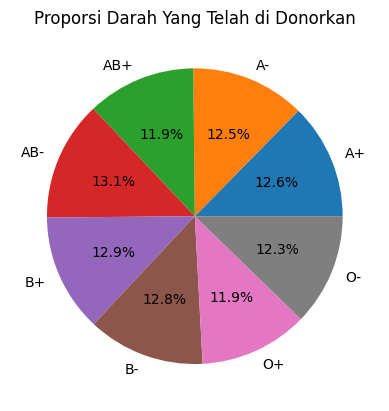

In [6]:
proporsiDonor = df.groupby('blood_group')['pints_donated'].sum()
plt.pie(proporsiDonor, labels=proporsiDonor.index, autopct='%1.1f%%')
plt.title('Proporsi Darah Yang Telah di Donorkan')
plt.show()

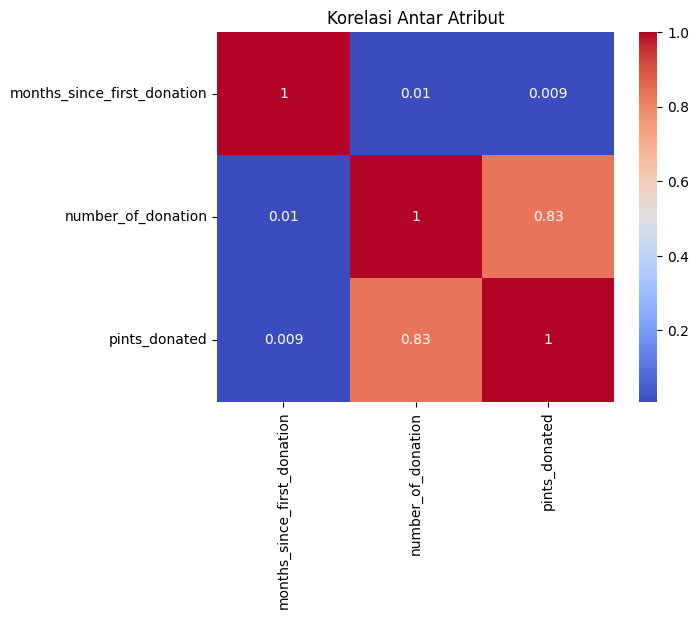

In [7]:
korelasiDataDonor = df.corr(numeric_only=True)
sns.heatmap(korelasiDataDonor, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Atribut')
plt.show()

Dari hasil analisis di atas diperoleh informasi bahwa dataset memiliki 2 tipe data, ada object dan integer. Ketika, mengecek nilai minimum, maksimum, rata-rata, standar deviasi, Q1, Q2, dan Q3. Hanya atribut yang berisi record dengan tipe data integer yang akan menampilkan nilai nilai tersebut.

Kemudian, diperolaeh informasi dari grafik pie atau pie chart bahwa persentase darah yang didistribusikan atau didonorkan itu lebih banyak dari golongan AB-, kemudian disusul oleh, B+, B-, A+, A-, O-, O+, dan terakhir AB+.

Terakhir dari visualisasi heatmap menunjukkan bahwa variabel number of donation memiliki pengaruh besar terhadap pints donated sebanyak 0.83 dibandingkan pengaruh months since first donation dengan number of donation atau pints donated dengan nilai 0.01 dan 0.009.

Maka, kesimpulan dari grafik heatmap ialah frekuensi donor lebih berpengaruh dalam menentukan total darah yang terkumpul dibandingkan bulan awal mmula melakukan donor darah.

 # **> POSTTEST 3**
 ## Instruksi:
 1. Data Cleaning
 - Handling missing value (jika ada)
 - Handling duplicate value (jika ada)
 - Handling outlier (jika ada)
 2. Normalisasi/standarisasi kolom numerik
 3. Encoding kolom kategorikal
 4. Feature engineering (minimal 1 feature baru)
 5. Splitting data ke dalam data training & data testing
 ---

## Cek missing value

tidak ada nilai yang kosong pada tiap record dan fitur tertentu.

In [8]:
df.isnull().sum()

,0
donor_id,0
name,0
email,0
password,0
contact_number,0
city,0
blood_group,0
availability,0
months_since_first_donation,0
number_of_donation,0


## Cek duplikasi data

tidak ada ditemukan adanya duplikasi pada data, sehingga bisa diasumsikan bahwa data bersih

In [9]:
duplicate = df.duplicated().sum()
print(duplicate)

0


## Cek outlier data

tidak ada outlier dari tiap kolom atau fitur dengan tipe data numerik, warna orange pada box plot mewakili fitur months_since_first_donation, kemudian warna hijau mewakili fitur number_of_donation, terakhir warna biru mewakili fitur pints_donated.

<Axes: ylabel='months_since_first_donation'>

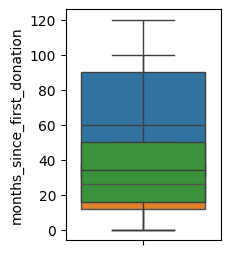

In [10]:
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(df['months_since_first_donation'])
sns.boxplot(df['number_of_donation'])
sns.boxplot(df['pints_donated'])

## Membuang atau mengurangi fitur yang tidak perlu

Dengan membuang beberapa fitur yang tidak relevan akan mempermudah proses training dan splitting data, karena lebih gampang untuk diubah menjadi numerikal menggunakan encoding

In [29]:
df = df.drop(['donor_id', 'name', 'email', 'password', 'contact_number', 'created_at'], axis=1)
display(df.head())

,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,Hobart,A+,No,65,31,62
1,Darwin,AB-,Yes,64,8,16
2,Melbourne,AB+,Yes,39,6,6
3,Darwin,A-,No,55,20,20
4,Darwin,O-,No,7,35,35


## Mengecek info dari sisa fitur
Ditemukan bahwa fitur fitur yang sudah didrop sudah tidak ada lagi sehingga yang tersisisa hanyalah fitur dengan tipe data integer dan beberapa yang dapat diubah menjadi numerik dengan encoding

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   city                         10000 non-null  object
 1   blood_group                  10000 non-null  object
 2   availability                 10000 non-null  object
 3   months_since_first_donation  10000 non-null  int64 
 4   number_of_donation           10000 non-null  int64 
 5   pints_donated                10000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


## Encoding fitur blood_group
Dengan memanggil library sklearn untuk mengimpor labelencoder, maka fitur blood_group bisa berubah menjadi numerik dimana;
 A+ = 0
 A- = 1
 AB+ = 2
 AB- = 3
 B+ = 4
 B- = 5
 O+ = 6
 O- = 7

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['blood_group'] = le.fit_transform(df['blood_group'])
df.head()

,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,Hobart,0,No,65,31,62
1,Darwin,3,Yes,64,8,16
2,Melbourne,2,Yes,39,6,6
3,Darwin,1,No,55,20,20
4,Darwin,7,No,7,35,35


## Encoding fitur city
Mengubah nama nama kota menjadi bentuk kategorikal agar lebih mudah saat masuk ke dalam datasplit

In [30]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'availability' in categorical_cols:
	categorical_cols.remove('availability')

if categorical_cols:
	df = pd.get_dummies(df, columns=categorical_cols)

print(df.describe())

       months_since_first_donation  number_of_donation  pints_donated
count                 10000.000000        10000.000000   10000.000000
mean                     59.953100           25.128200      37.614000
std                      34.911379           14.654195      26.334072
min                       0.000000            0.000000       0.000000
25%                      30.000000           12.000000      16.000000
50%                      60.000000           26.000000      34.000000
75%                      90.000000           38.000000      50.000000
max                     120.000000           50.000000     100.000000


## Encoding fitur availability
Mengubah atau menimpa nilai string yang awalnya Yes dan No dengan nilai numerik yaitu 1 dan 0.

In [31]:
df['availability'] = df['availability'].replace({1: 'Yes', 0: 'No'})
df.head()

,availability,months_since_first_donation,number_of_donation,pints_donated,city_Adelaide,city_Brisbane,city_Canberra,city_Darwin,city_Hobart,city_Melbourne,city_Perth,city_Sydney,blood_group_A+,blood_group_A-,blood_group_AB+,blood_group_AB-,blood_group_B+,blood_group_B-,blood_group_O+,blood_group_O-
0,No,65,31,62,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
1,Yes,64,8,16,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,Yes,39,6,6,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,No,55,20,20,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,No,7,35,35,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


## Feature Engineering
Menambahkan satu fitur baru untuk menghitung frekuensi donor darah tiap bulan

In [32]:
df['donation_cadence'] = df['number_of_donation'] / (df['months_since_first_donation'] + 1)
df.head()

,availability,months_since_first_donation,number_of_donation,pints_donated,city_Adelaide,city_Brisbane,city_Canberra,city_Darwin,city_Hobart,city_Melbourne,...,city_Sydney,blood_group_A+,blood_group_A-,blood_group_AB+,blood_group_AB-,blood_group_B+,blood_group_B-,blood_group_O+,blood_group_O-,donation_cadence
0,No,65,31,62,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,0.469697
1,Yes,64,8,16,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,0.123077
2,Yes,39,6,6,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,0.150000
3,No,55,20,20,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,0.357143
4,No,7,35,35,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,4.375000


## Normalisasi data

Mengubah semua nilai numerik dengan kisaran 0 - 1 menggunakan fungsi normalisasi MinMaxScaler. Bertujuan agar data tidak tersebar terlalu jauh dari titik centroid (jika menggunakan scatter plot)

In [33]:
donation_thresh = df['number_of_donation'].quantile(0.75)
pints_thresh = df['pints_donated'].quantile(0.75)

df['top_donor'] = np.where(
	(df['number_of_donation'] > donation_thresh) | (df['pints_donated'] > pints_thresh),
	'Yes',
	'No'
)
print("Ambang (75%) - number_of_donation:", donation_thresh, "pints_donated:", pints_thresh)
print(df['top_donor'].value_counts())

normalization = MinMaxScaler()
numerical_cols = ['months_since_first_donation', 'number_of_donation', 'pints_donated', 'donation_cadence']
x_norm = normalization.fit_transform(df[numerical_cols])

x_norm = pd.DataFrame(x_norm, columns=numerical_cols, index=df.index)
final_data = pd.concat([df.drop(numerical_cols, axis=1), x_norm], axis=1)

print(final_data.head())

Ambang (75%) - number_of_donation: 38.0 pints_donated: 50.0
top_donor
No     6349
Yes    3651
Name: count, dtype: int64
  availability  city_Adelaide  city_Brisbane  city_Canberra  city_Darwin  \
0           No          False          False          False        False   
1          Yes          False          False          False         True   
2          Yes          False          False          False        False   
3           No          False          False          False         True   
4           No          False          False          False         True   

   city_Hobart  city_Melbourne  city_Perth  city_Sydney  blood_group_A+  ...  \
0         True           False       False        False            True  ...   
1        False           False       False        False           False  ...   
2        False            True       False        False           False  ...   
3        False           False       False        False           False  ...   
4        False         

## Split data
Terakhir, splitting data dilakukan ketika semua proses pre-processing telah usai dan hanya tersisa splitting. Ini bertujuan untuk memisahkan data sebanyak 80% untuk dipakai latihan oleh mesin dan 20% untuk dipakai ujian oleh mesin, sehingga mesin memperoleh output berdasarkan hasil dari pembelajaran, bukan hafalan.

In [34]:
data_target = 'top_donor'

keep = ['months_since_first_donation', 'donation_cadence']
keep += [c for c in final_data.columns if c.startswith('city_') or c.startswith('blood_group_')]
x = final_data.loc[:, keep].copy()
y = final_data[data_target].map({'Yes': 1, 'No': 0}).astype(int)

obj_cols = x.select_dtypes(include=['object', 'category']).columns.tolist()
for col in obj_cols:
	x[col] = LabelEncoder().fit_transform(x[col])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)

print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi X_train: (8000, 18)
Dimensi X_test: (2000, 18)
Dimensi y_train: (8000,)
Dimensi y_test: (2000,)


#POSTTEST 4
Supervised Learning
(variabel X min. 2).

###A1. Implementasikan metode:


*   Support Vector Classifier (dari SVM), jika menggunakan label Kategorikal pada dataset kalian (Klasifikasi).

    Point Plus: Jika ditambah menggunakan Random Forest/KNN/Naive Bayes/Metode Lainnya beserta penjelasannya pada markdown.
*   Linear Regression, jika menggunakan label Numerik pada dataset kalian (Regresi).

    Point Plus: Jika ditambah menggunakan Support Vector Regressor/Metode Lainnya beserta penjelasannya pada markdown.
---
###A2. Hasil prediksi harus dievaluasi masing-masing:

*   Klasifikasi: Confusion Matrix (Cek File IPYNB) & Classification Report
*   Regresi: **MAE**, **MSE**, **RMSE**, dan **R2-Score**

    *Baik klasifikasi maupun regresi WAJIB ada penjelasannya*.

---

###A3. Buat plot untuk hasil prediksi-nya (wajib) se-menarik dan se-informatif mungkin.
*   *Point Plus: Plot titik-titik hasil prediksi nilai pada target, beserta dengan titik-titik target aslinya.*




In [38]:
new_model = RandomForestClassifier(random_state=42, class_weight='balanced')
new_model.fit(X_train,y_train)

y_pred = new_model.predict(X_test)

labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
report = classification_report(y_test, y_pred, labels=labels, target_names=[str(label) for label in labels])
print(report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1270
           1       0.79      0.78      0.79       730

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000



Pada bagian ini perlu memanggil svm dari sklearn untuk melakukan prediksi terhadap data yang telah displit

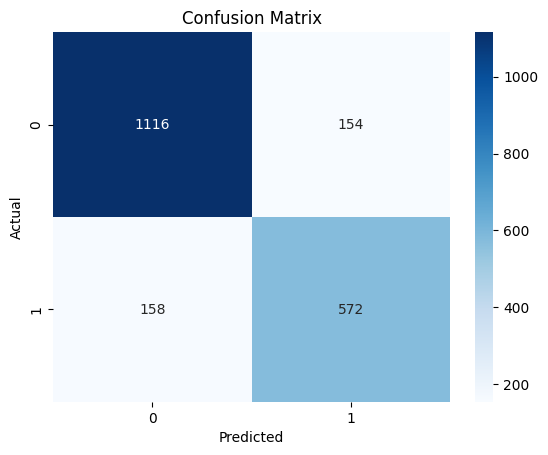

In [39]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Hasil dari confusiom matrix menunjukkan bahwa data aktual dan prediksi terbagi dengan rata dan tidak ada yang terlalu mendominasi

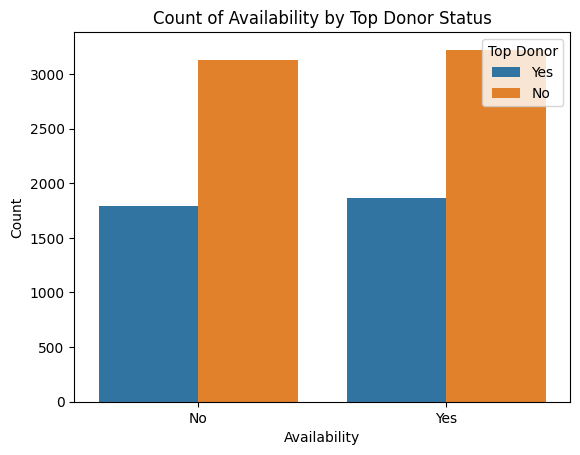

In [40]:
sns.countplot(data=final_data, x='availability', hue='top_donor')
plt.title('Count of Availability by Top Donor Status')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.legend(title='Top Donor', loc='upper right')
plt.show()

Top Donor cenderung memiliki ketersediaan (Availability) 'Yes': Jumlah donor yang dikategorikan sebagai "Top Donor" (ditandai dengan warna oranye) jauh lebih tinggi pada kategori "Yes" dibandingkan dengan kategori "No" pada sumbu horizontal (Availability). Ini menunjukkan bahwa donor yang bersedia untuk dihubungi (Availability: Yes) lebih sering menjadi top donor.

Mayoritas donor bukan Top Donor, terlepas dari ketersediaan: Meskipun ada peningkatan jumlah "Top Donor" pada kategori "Yes", secara keseluruhan jumlah "No" (bukan Top Donor, ditandai dengan warna biru) masih lebih tinggi di kedua kategori "Yes" dan "No" pada sumbu Availability. Ini berarti sebagian besar donor dalam dataset ini tidak termasuk dalam kategori "Top Donor", meskipun mereka bersedia untuk dihubungi.

Ketersediaan bukan satu-satunya faktor penentu Top Donor: Meskipun ada hubungan yang jelas antara ketersediaan dan status "Top Donor", grafik ini juga menunjukkan bahwa ada "Top Donor" pada kategori "No" (meskipun jumlahnya lebih sedikit) dan "bukan Top Donor" pada kategori "Yes". Ini mengindikasikan bahwa faktor lain (seperti frekuensi donasi dan jumlah pints yang didonasikan) juga memainkan peran penting dalam menentukan apakah seseorang adalah "Top Donor".

#POSTTEST 5

Buatlah model deep learning dengan ketentuan sebagai berikut:
Instruksi:
1. Dataset tidak boleh sama antar praktikan
2. Minimal akurasi training 70% dan validation 70%
3. Gunakan sequential model
4. Buat model deep learning sederhana
Rekomendasi: Gunakan dataset yang sudah bersih seperti dari library sklearn, tensorflow, MNIST, atau dari library lainnya

Ketentuan Pengumpulan:
1. Push/upload ke dalam public repository Github dengan nama Praktikum_KB.
2. Di dalam repository tersebut, buat folder baru dengan nama Posttest_KB_5.
3. Kumpulkan link folder repository tersebut.
4. File yang berada di dalam folder adalah script kodingan (.ipynb), dan jika menggunakan dataset eksternal maka upload juga file dataset (.csv).

---

In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

coba_modelling = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
coba_modelling.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

print("Coba modelling summary:")
coba_modelling.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Coba modelling summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

Pertama, saya siapkan data saya agar format angkanya seragam. Lalu, saya bangun "otak buatan" sederhana dengan dua lapisan: lapisan pertama punya 8 neuron untuk memproses input, dan lapisan terakhir punya 1 neuron untuk memberikan hasil prediksi dalam bentuk probabilitas (antara 0 dan 1). Saya atur cara belajarnya pakai strategi 'adam', mengukur kesalahannya pakai 'binary_crossentropy', dan menilai kinerjanya pakai 'accuracy'.

Terakhir, saya mencetak ringkasan model saya untuk melihat struktur lengkapnya, termasuk jumlah lapisan, neuron, dan parameter yang akan dipelajari.

In [42]:
coba_modelling.fit(X_train, y_train, epochs=80, batch_size=16,
                   validation_split=0.2,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                   verbose=2)

loss, acc = coba_modelling.evaluate(X_test, y_test, verbose=0)
print(f"Coba modelling - Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

Epoch 1/80
400/400 - 3s - 8ms/step - accuracy: 0.5811 - loss: 0.6761 - val_accuracy: 0.6275 - val_loss: 0.6711
Epoch 2/80
400/400 - 1s - 4ms/step - accuracy: 0.6367 - loss: 0.6588 - val_accuracy: 0.6275 - val_loss: 0.6672
Epoch 3/80
400/400 - 1s - 3ms/step - accuracy: 0.6367 - loss: 0.6561 - val_accuracy: 0.6275 - val_loss: 0.6650
Epoch 4/80
400/400 - 1s - 3ms/step - accuracy: 0.6367 - loss: 0.6547 - val_accuracy: 0.6275 - val_loss: 0.6634
Epoch 5/80
400/400 - 1s - 3ms/step - accuracy: 0.6367 - loss: 0.6538 - val_accuracy: 0.6275 - val_loss: 0.6624
Epoch 6/80
400/400 - 1s - 3ms/step - accuracy: 0.6367 - loss: 0.6529 - val_accuracy: 0.6288 - val_loss: 0.6610
Epoch 7/80
400/400 - 1s - 3ms/step - accuracy: 0.6370 - loss: 0.6520 - val_accuracy: 0.6288 - val_loss: 0.6609
Epoch 8/80
400/400 - 1s - 3ms/step - accuracy: 0.6372 - loss: 0.6513 - val_accuracy: 0.6300 - val_loss: 0.6597
Epoch 9/80
400/400 - 1s - 3ms/step - accuracy: 0.6372 - loss: 0.6504 - val_accuracy: 0.6294 - val_loss: 0.6580
E

Setelah modelnya siap, saya latih model otak buatan saya menggunakan data training. Saya ulangi prosesnya beberapa kali (hingga 80 epochs), memproses data dalam kelompok kecil (16 batch size), dan saya gunakan sebagian data training sebagai data validasi untuk memantau agar model tidak overfitting. Ada juga "pengawas" yang saya pasang untuk menghentikan pelatihan lebih awal jika performanya tidak membaik. Setelah pelatihan selesai, saya uji model saya dengan data testing yang belum pernah dilihatnya dan saya cetak hasilnya untuk melihat seberapa akurat prediksi model saya.

In [43]:
y_pred_proba = coba_modelling.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).reshape(-1)

print("Confusion Matrix:")
print(confusion_matrix(y_test.astype(int), y_pred))
print("Classification Report:")
print(classification_report(y_test.astype(int), y_pred, digits=4))

Confusion Matrix:
[[1062  208]
 [ 124  606]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8954    0.8362    0.8648      1270
           1     0.7445    0.8301    0.7850       730

    accuracy                         0.8340      2000
   macro avg     0.8200    0.8332    0.8249      2000
weighted avg     0.8403    0.8340    0.8357      2000



Setelah dilatih, saya gunakan model saya untuk membuat prediksi pada data testing. Hasil prediksi ini berupa probabilitas, jadi saya ubah menjadi Yes (1) atau No (0) berdasarkan ambang batas 0.5. Kemudian, saya cek hasil prediksi saya menggunakan Confusion Matrix untuk melihat berapa banyak yang benar dan salah, serta Classification Report untuk mendapatkan nilai Precision, Recall, dan F1-score yang lebih rinci. Ini membantu saya memahami kualitas prediksi model saya

In [44]:
y_test_int = y_test.astype(int).values if hasattr(y_test, "values") else y_test.astype(int)
y_pred_int = y_pred.astype(int)

try:
    auc = roc_auc_score(y_test_int, y_pred_proba.reshape(-1))
except Exception:
    auc = None

acc_sc = accuracy_score(y_test_int, y_pred_int)
prec = precision_score(y_test_int, y_pred_int, zero_division=0)
rec = recall_score(y_test_int, y_pred_int, zero_division=0)
f1 = f1_score(y_test_int, y_pred_int, zero_division=0)

print("Hasil evaluasi tambahan:")
if auc is not None:
    print(f"  AUC: {auc:.4f}")
else:
    print("  AUC: tidak dapat dihitung (mungkin hanya satu kelas pada test set)")

print(f"  Accuracy (sklearn): {acc_sc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall: {rec:.4f}")
print(f"  F1-score: {f1:.4f}")

Hasil evaluasi tambahan:
  AUC: 0.9157
  Accuracy (sklearn): 0.8340
  Precision: 0.7445
  Recall: 0.8301
  F1-score: 0.7850


Setelah melihat hasil prediksi, saya hitung beberapa metrik tambahan seperti AUC, Akurasi, Precision, Recall, dan F1-score untuk mendapatkan gambaran yang lebih lengkap tentang seberapa baik model saya memprediksi. Saya pastikan data saya dalam format yang benar untuk perhitungan ini dan saya tangani jika ada masalah saat menghitung AUC. Terakhir, saya cetak semua nilai metrik ini agar saya bisa melihat detail performa model saya.

In [45]:
save_path = "modelp5/coba_modelling.h5"
coba_modelling.save(save_path)
print(f"Model tersimpan di: {save_path}")

Model tersimpan di: modelp5/coba_modelling.h5


Setelah model saya selesai dilatih, saya simpan model tersebut ke dalam sebuah file agar bisa saya gunakan di lain waktu tanpa perlu melatihnya lagi. Saya juga mencetak lokasi file tempat model itu tersimpan.